In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'
df = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]
print(df.head())
# Визначаємо кількість рядків та стовпців
print("Shape of the dataframe:", df.shape)

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —
Shape of the dataframe: (28, 9)


In [7]:
# Визначаємо кількість рядків та стовпців
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (28, 9)


In [9]:
#Замініть у таблиці значення "—" на значення NaN
df.replace("—", np.nan, inplace=True)
print(df)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [11]:
print("Data types of columns:")
print(df.dtypes)

Data types of columns:
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


In [17]:
# Замінюємо типи нечислових колонок на числові
non_numeric_columns = df.columns[df.dtypes == object]
df[non_numeric_columns] = df[non_numeric_columns].apply(pd.to_numeric, errors="coerce")

In [14]:
# Визначаємо частку пропусків в кожному стовпці
print("Percentage of missing values in each column:")
print((df.isnull().sum() / df.shape[0]) * 100)

Percentage of missing values in each column:
Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64


In [23]:
# Видаліть з таблиці дані по всій країні, останній рядок таблиці
df = df.iloc[:-1]
print(df)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1     —
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [68]:
# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
df = tables.fillna(0)
print(df)

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126    —    —
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82    —
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51    —
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

In [71]:
# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
# Конвертация значений столбца '2019' в числовой формат (убираем возможные символы, например, '-')
df['2019'] = pd.to_numeric(df['2019'], errors='coerce')

# Фильтрация регионов, где уровень рождаемости в 2019 году выше среднего уровня по Украине
higher_than_average = df[df['2019'] > df['2019'].mean()]

# Получение списка регионов
regions_higher_than_average = higher_than_average['Регіон'].tolist()

print("Регіони з рівнем народжуваності у 2019 році вищим за середній по Україні:")
print(regions_higher_than_average)

Регіони з рівнем народжуваності у 2019 році вищим за середній по Україні:
['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ', 'Україна']


In [74]:
# У якому регіоні була найвища народжуваність у 2014 році?
df['2014'] = pd.to_numeric(df['2014'],errors='coerce')
region_with_highest_birth_rate_2014 = df.loc[df['2014'].idxmax(), 'Регіон']
print("Регіон з найвищим рівнем народжуваності у 2014 році:", region_with_highest_birth_rate_2014)

Регіон з найвищим рівнем народжуваності у 2014 році: Рівненська


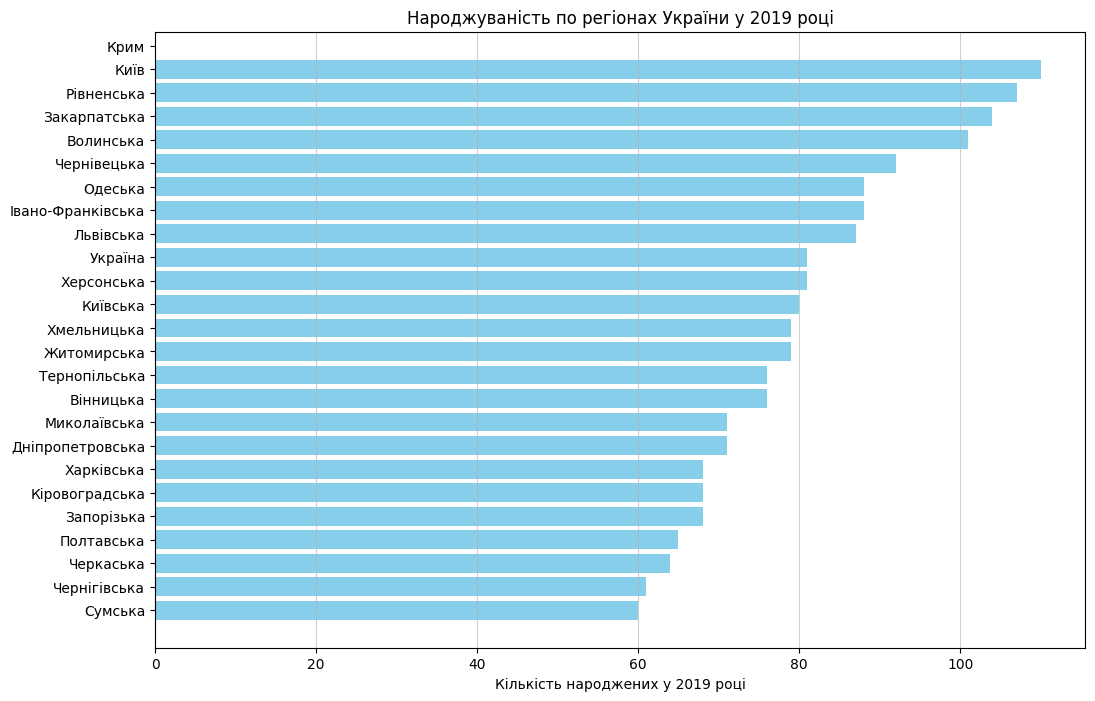

In [6]:
# Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

# Конвертація значень стовпця "2019" в числовий формат
df['2019'] = pd.to_numeric(df['2019'], errors='coerce')

# Відсортуємо DataFrame за значенням "2019" у зростаючому порядку
df_sorted = df.sort_values(by='2019')

# Побудова стовпчикової діаграми
plt.figure(figsize=(12, 8))
plt.barh(df_sorted['Регіон'], df_sorted['2019'], color='skyblue')
plt.xlabel('Кількість народжених у 2019 році')
plt.title('Народжуваність по регіонах України у 2019 році')
plt.grid(axis='x', linestyle='-', alpha=0.6)

plt.show()